# <span style='font-family:"Times New Roman"'> <span styel=''>Cohort Analysis 

In [5]:
# Import libraries necessary for this project

import pandas as pd
import numpy as np
from datetime import datetime as dt

In [6]:
# Display for notebook

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
# Data import from dataset folder

customer = pd.read_csv('./dataset/online.csv')

customer.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,416792,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom
1,482904,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom
2,263743,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom
3,495549,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom
4,204384,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom


In [10]:
# Basic info of data

customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70864 entries, 0 to 70863
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   70864 non-null  int64  
 1   InvoiceNo    70864 non-null  int64  
 2   StockCode    70864 non-null  object 
 3   Description  70864 non-null  object 
 4   Quantity     70864 non-null  int64  
 5   InvoiceDate  70864 non-null  object 
 6   UnitPrice    70864 non-null  float64
 7   CustomerID   70864 non-null  int64  
 8   Country      70864 non-null  object 
dtypes: float64(1), int64(4), object(4)
memory usage: 4.9+ MB


In [149]:
## Data Preprocessing 

In [34]:
type(customer.loc[0,'InvoiceDate'])

str

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
416792,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom
482904,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom
263743,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom
495549,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom
204384,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom


In [13]:
customer['InvoiceDate']=pd.to_datetime(customer['InvoiceDate'])

In [14]:
customer['InvoiceDay'] = customer['InvoiceDate'].apply(lambda x: dt(x.year, x.month, x.day))

In [15]:
grouping = customer.groupby('CustomerID')['InvoiceDay']

In [16]:
count=0
for key, item in grouping:
    print(key)
    print(item)
    count +=1
    if count >2:
        break
        
        

12747
1428    2011-08-22
2359    2011-01-20
3694    2011-12-07
4657    2011-05-25
5505    2011-10-04
6979    2011-12-07
10642   2011-05-25
13111   2011-06-28
13161   2011-11-17
20506   2011-03-01
23521   2011-01-20
27036   2011-05-25
28479   2011-05-25
28583   2011-06-28
29081   2011-06-28
33300   2010-12-05
36562   2011-11-17
38362   2011-10-04
41327   2011-12-07
44674   2011-03-01
47007   2011-06-28
50015   2011-01-20
50583   2010-12-13
51501   2011-08-22
56217   2011-05-05
60979   2010-12-05
67084   2011-12-07
Name: InvoiceDay, dtype: datetime64[ns]
12748
73      2011-11-29
79      2011-01-05
178     2010-12-10
388     2011-05-08
473     2011-09-11
           ...    
70454   2011-03-18
70556   2010-12-10
70688   2011-09-11
70762   2011-11-07
70861   2011-07-14
Name: InvoiceDay, Length: 967, dtype: datetime64[ns]
12749
599     2011-05-10
1744    2011-05-10
2935    2011-08-01
5369    2011-11-17
6579    2011-11-17
8434    2011-11-17
9107    2011-12-06
11334   2011-08-01
14538   2011-08

In [19]:
customer['CohortMonth'] = grouping.transform(min)

In [20]:
customer.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDay,CohortMonth
0,416792,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom,2011-10-25,2011-04-11
1,482904,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom,2011-11-20,2011-09-12
2,263743,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom,2011-07-14,2011-07-14
3,495549,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom,2011-11-23,2011-11-23
4,204384,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom,2011-05-25,2011-02-25


In [21]:
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

In [22]:
Invoice_year, Invoice_month, Invoice_day = get_date_int(customer, 'InvoiceDay')

In [23]:
Cohort_year, Cohort_month, Cohort_day = get_date_int(customer, 'CohortMonth')

In [24]:
customer['CohortIndex'] = (np.floor(((Invoice_year - Cohort_year) * 365 + (Invoice_month - Cohort_month) * 30 + (Invoice_day - Cohort_day) )/30) + 1).astype(int)

In [25]:
customer.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDay,CohortMonth,CohortIndex
0,416792,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom,2011-10-25,2011-04-11,7
1,482904,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom,2011-11-20,2011-09-12,3
2,263743,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom,2011-07-14,2011-07-14,1
3,495549,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom,2011-11-23,2011-11-23,1
4,204384,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom,2011-05-25,2011-02-25,4


In [26]:
customer['CohortIndex'].unique()

array([ 7,  3,  1,  4, 10,  6,  2, 11,  8,  5, 13, 12,  9])

In [27]:
customer['CohortDay'] = customer['CohortMonth'].apply(lambda x: dt(x.year, x.month, 1))

In [28]:
customer.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDay,CohortMonth,CohortIndex,CohortDay
0,416792,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom,2011-10-25,2011-04-11,7,2011-04-01
1,482904,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom,2011-11-20,2011-09-12,3,2011-09-01
2,263743,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom,2011-07-14,2011-07-14,1,2011-07-01
3,495549,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom,2011-11-23,2011-11-23,1,2011-11-01
4,204384,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom,2011-05-25,2011-02-25,4,2011-02-01


In [29]:
value = dt.strptime('2011-04-01', '%Y-%m-%d')

In [30]:
customer.loc[customer['CohortDay']==value][['CustomerID', 'CohortIndex', 'InvoiceDay']]

,CustomerID,CohortIndex,InvoiceDay
0,14286,7,2011-10-25
12,14546,2,2011-05-22
19,16729,5,2011-09-01
33,16469,6,2011-09-13
86,16639,1,2011-05-17
...,...,...,...
70836,14105,1,2011-04-14
70841,13952,1,2011-04-15
70847,16915,1,2011-04-05
70849,13735,1,2011-04-19


In [31]:
grouping = customer.groupby(['CohortDay', 'CohortIndex'])
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique)


In [32]:
type(cohort_data)

pandas.core.series.Series

In [33]:
cohort_data = cohort_data.reset_index()

In [34]:
cohort_data

,CohortDay,CohortIndex,CustomerID
0,2010-12-01,1,716
1,2010-12-01,2,252
2,2010-12-01,3,231
3,2010-12-01,4,248
4,2010-12-01,5,245
...,...,...,...
85,2011-10-01,2,55
86,2011-10-01,3,3
87,2011-11-01,1,291
88,2011-11-01,2,8


In [35]:
cohort_counts = cohort_data.pivot(index='CohortDay',columns='CohortIndex', values='CustomerID')

In [36]:
print(cohort_counts)

CohortIndex     1      2      3      4      5      6      7      8      9   \
CohortDay                                                                    
2010-12-01   716.0  252.0  231.0  248.0  245.0  281.0  254.0  234.0  235.0   
2011-01-01   332.0   75.0   94.0  101.0   87.0   89.0   87.0   93.0  105.0   
2011-02-01   316.0   70.0   69.0   87.0   62.0   82.0   82.0   73.0   96.0   
2011-03-01   388.0   72.0   95.0   81.0   75.0   76.0   92.0   98.0   84.0   
2011-04-01   255.0   57.0   42.0   55.0   42.0   52.0   64.0   47.0    5.0   
2011-05-01   249.0   42.0   38.0   45.0   57.0   60.0   55.0    3.0    NaN   
2011-06-01   207.0   29.0   34.0   36.0   54.0   50.0    4.0    NaN    NaN   
2011-07-01   173.0   24.0   35.0   39.0   38.0    NaN    NaN    NaN    NaN   
2011-08-01   139.0   29.0   38.0   25.0    1.0    NaN    NaN    NaN    NaN   
2011-09-01   279.0   72.0   68.0    3.0    NaN    NaN    NaN    NaN    NaN   
2011-10-01   318.0   55.0    3.0    NaN    NaN    NaN    NaN    

In [37]:
cohort_col = cohort_counts.iloc[:,0]

In [38]:
cohort_counts = cohort_counts.divide(cohort_col, axis=0)*100

In [39]:
print(cohort_counts)

CohortIndex     1          2          3          4          5          6   \
CohortDay                                                                   
2010-12-01   100.0  35.195531  32.262570  34.636872  34.217877  39.245810   
2011-01-01   100.0  22.590361  28.313253  30.421687  26.204819  26.807229   
2011-02-01   100.0  22.151899  21.835443  27.531646  19.620253  25.949367   
2011-03-01   100.0  18.556701  24.484536  20.876289  19.329897  19.587629   
2011-04-01   100.0  22.352941  16.470588  21.568627  16.470588  20.392157   
2011-05-01   100.0  16.867470  15.261044  18.072289  22.891566  24.096386   
2011-06-01   100.0  14.009662  16.425121  17.391304  26.086957  24.154589   
2011-07-01   100.0  13.872832  20.231214  22.543353  21.965318        NaN   
2011-08-01   100.0  20.863309  27.338129  17.985612   0.719424        NaN   
2011-09-01   100.0  25.806452  24.372760   1.075269        NaN        NaN   
2011-10-01   100.0  17.295597   0.943396        NaN        NaN        NaN   

In [40]:
cohort_counts = cohort_counts.round(3)/100

In [46]:
cohort_counts.head()

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortDay,,,,,,,,,,,,,
2010-12-01,1.0,0.35196,0.32263,0.34637,0.34218,0.39246,0.35475,0.32682,0.32821,0.36173,0.38827,0.48883,0.17179
2011-01-01,1.0,0.22590,0.28313,0.30422,0.26205,0.26807,0.26205,0.28012,0.31627,0.35843,0.25904,0.01506,NaN
2011-02-01,1.0,0.22152,0.21835,0.27532,0.19620,0.25949,0.25949,0.23101,0.30380,0.23418,0.00633,NaN,NaN
2011-03-01,1.0,0.18557,0.24485,0.20876,0.19330,0.19588,0.23711,0.25258,0.21649,0.01804,NaN,NaN,NaN
2011-04-01,1.0,0.22353,0.16471,0.21569,0.16471,0.20392,0.25098,0.18431,0.01961,NaN,NaN,NaN,NaN


In [49]:
cohort_counts.index

DatetimeIndex(['2010-12-01', '2011-01-01', '2011-02-01', '2011-03-01',
               '2011-04-01', '2011-05-01', '2011-06-01', '2011-07-01',
               '2011-08-01', '2011-09-01', '2011-10-01', '2011-11-01',
               '2011-12-01'],
              dtype='datetime64[ns]', name='CohortDay', freq=None)

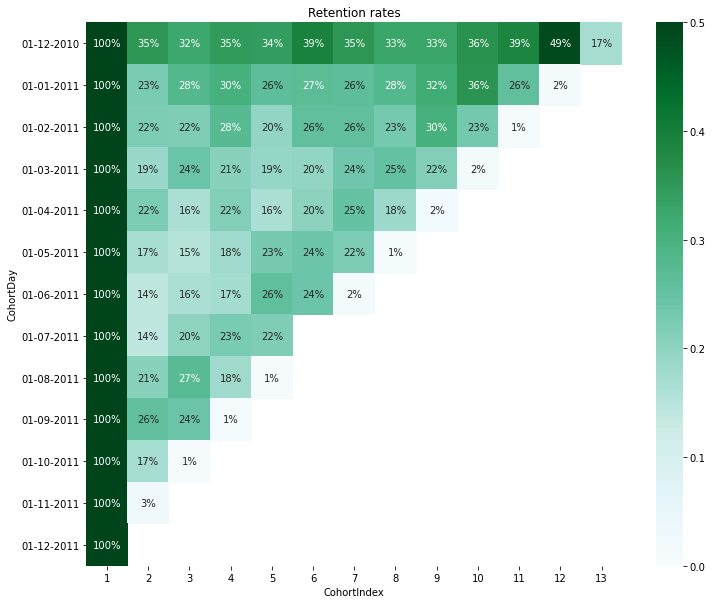

In [56]:
plt.figure(figsize=(12, 10))
plt.title('Retention rates')
ax = sns.heatmap(data = cohort_counts,
annot = True,
fmt = '.0%',
vmin = 0.0,
vmax = 0.5,
cmap = 'BuGn')
ax.set_yticklabels(cohort_counts.index.strftime('%d-%m-%Y'))
plt.show()

In [57]:
cohort_data_unit_price = grouping['UnitPrice'].mean()

cohort_data_unit_price = cohort_data_unit_price.reset_index()

cohort_unit_price = cohort_data_unit_price.pivot(index='CohortDay',columns='CohortIndex', values='UnitPrice')

In [148]:
print(cohort_unit_price)

CohortIndex        1         2         3         4         5         6   \
CohortDay                                                                 
2010-12-01   3.045548  3.055050  3.029915  2.741392  2.746671  6.858076   
2011-01-01   3.155268  2.967818  3.062072  3.110067  3.349358  2.808876   
2011-02-01   3.080738  3.674737  3.154842  2.967479  3.351729  2.887312   
2011-03-01   3.565177  3.379547  3.410063  2.723730  2.542413  2.350073   
2011-04-01   3.303096  4.015403  3.425765  2.824296  2.632913  2.769174   
2011-05-01   3.102977  2.728021  2.682865  2.484194  2.247844  2.381416   
2011-06-01   2.799238  1.928195  3.512443  2.590968  2.365590  2.521538   
2011-07-01   3.167464  4.073308  2.502490  2.578261  2.277651       NaN   
2011-08-01   3.176173  3.296893  7.539023  4.029261  1.950000       NaN   
2011-09-01   2.916079  3.126892  2.775806  1.800000       NaN       NaN   
2011-10-01   2.881658  2.572753  2.484286       NaN       NaN       NaN   
2011-11-01   2.460742  3.

In [58]:
cohort_unit_price = cohort_unit_price.round(3)/100

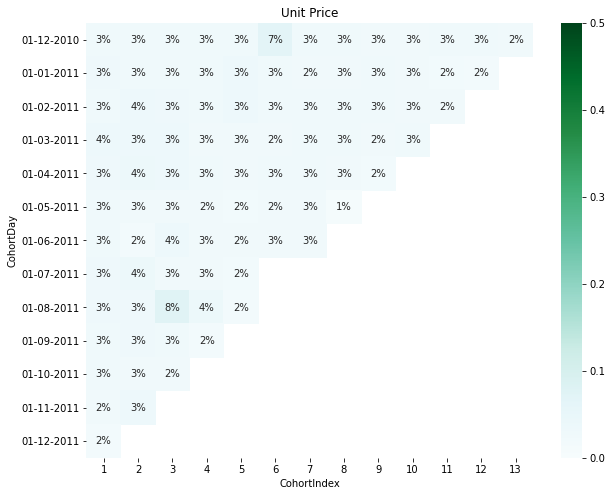

In [59]:
plt.figure(figsize=(10, 8))
plt.title('Unit Price')
ax = sns.heatmap(data = cohort_unit_price,
annot = True,
fmt = '.0%',
vmin = 0.0,
vmax = 0.5,
cmap = 'BuGn')
ax.set_yticklabels(cohort_counts.index.strftime('%d-%m-%Y'))
plt.show()

In [60]:
cohort_data_quantity = grouping['Quantity'].mean()

cohort_data_quantity = cohort_data_quantity.reset_index()

cohort_quantity = cohort_data_quantity.pivot(index='CohortDay',columns='CohortIndex', values='Quantity')

print(cohort_quantity)

CohortIndex         1          2          3          4          5          6   \
CohortDay                                                                       
2010-12-01   11.236050  12.281172  11.578502  12.932294  15.269254  10.578215   
2011-01-01   10.585031   9.127273  10.919517  12.199667  13.596226  13.945693   
2011-02-01   12.351549  11.100478  11.240688  12.807851  17.677233  14.990888   
2011-03-01    9.555757  16.481586  11.693277  11.778226  14.299304  14.355932   
2011-04-01    9.941900   9.050336  16.347059  11.528169   9.860870   9.595870   
2011-05-01   13.898188  12.276042  11.634831  11.258065  11.023952   8.057803   
2011-06-01   10.980245  19.699248  13.607955   9.350806  10.174359   8.010989   
2011-07-01   11.135974   9.569231   7.136546   8.488294   6.228571        NaN   
2011-08-01    9.687559   5.022676   6.298851   6.581281   8.000000        NaN   
2011-09-01   10.886659   7.492843   8.723785  14.750000        NaN        NaN   
2011-10-01    8.877723   7.6

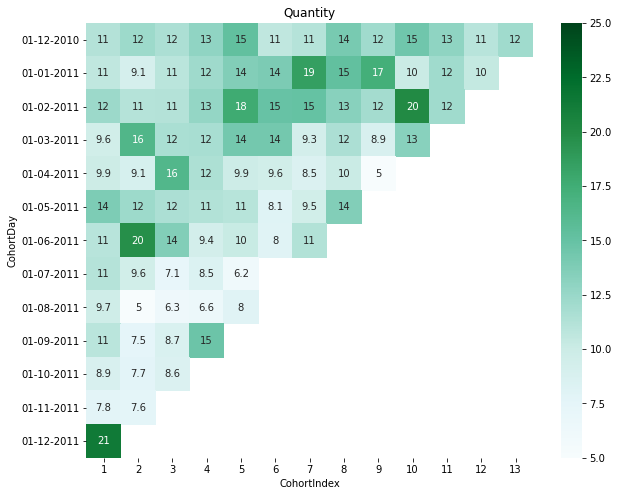

In [67]:
plt.figure(figsize=(10,8))
plt.title("Quantity")
ax = sns.heatmap(data = cohort_quantity, annot = True, vmin = 5.0, vmax = 25.0, cmap='BuGn')
ax.set_yticklabels(cohort_counts.index.strftime('%d-%m-%Y'))
plt.show()

Unnamed: 0  InvoiceNo StockCode  \
CohortDay  CohortIndex                                    
2010-12-01 1                 58315     541225      POST   
           2                 87640     543674         M   
           3                116433     546246    90214K   
           4                156814     550173         M   
           5                189894     553173         M   
...                            ...        ...       ...   
2011-10-01 2                539071     581430      POST   
           3                537956     581377     85066   
2011-11-01 1                541561     581501    90199C   
           2                540004     581454     84879   
2011-12-01 1                538817     581416    90214N   

                                             Description  Quantity  \
CohortDay  CohortIndex                                               
2010-12-01 1            ZINC WILLIE WINKIE  CANDLE STICK      1008   
           2              ZINC TOP  2 DOOR WOODEN SHELF        600   
           3            ZINC WILLIE WINKIE  CANDLE STICK      1200   
           4            ZINC WILLIE WINKIE  CANDLE STICK       720   
           5            ZINC WILLIE WINKIE  CANDLE STICK      1008   
...                                                  ...       ...   
2011-10-01 2            ZINC WIRE SWEETHEART LETTER TRAY       144   
           3                ZINC HEARTS PLANT POT HOLDER        48   
2011-11-01 1                 ZINC WIRE KITCHEN ORGANISER       480   
           2                   WOODEN CROQUET GARDEN SET        24   
2011-12-01 1            ZINC WILLIE WINKIE  CANDLE STICK      1404   

                               InvoiceDate  UnitPrice  CustomerID  \
CohortDay  CohortIndex                                              
2010-12-01 1           2011-01-14 14:47:00     125.00       18269   
           2           2011-02-11 11:28:00     125.00       18245   
           3           2011-03-10 13:28:00     125.00       18239   
           4           2011-04-14 16:58:00     145.00       18260   
           5           2011-05-13 17:34:00      39.95       18260   
...                                    ...        ...         ...   
2011-10-01 2           2011-12-08 15:44:00      24.95       18154   
           3           2011-12-08 12:44:00      12.75       14138   
2011-11-01 1           2011-12-09 10:46:00      25.00       18274   
           2           2011-12-08 18:22:00      14.95       17668   
2011-12-01 1           2011-12-08 14:58:00       9.95       18282   

                               Country InvoiceDay CohortMonth  
CohortDay  CohortIndex                                         
2010-12-01 1            United Kingdom 2011-01-14  2010-12-23  
           2            United Kingdom 2011-02-11  2010-12-23  
           3            United Kingdom 2011-03-10  2010-12-23  
           4            United Kingdom 2011-04-14  2010-12-23  
           5            United Kingdom 2011-05-13  2010-12-23  
...                                ...        ...         ...  
2011-10-01 2            United Kingdom 2011-12-08  2011-10-30  
           3            United Kingdom 2011-12-08  2011-10-07  
2011-11-01 1            United Kingdom 2011-12-09  2011-11-30  
           2            United Kingdom 2011-12-08  2011-11-06  
2011-12-01 1            United Kingdom 2011-12-08  2011-12-08  

[90 rows x 11 columns]

In [64]:
max_date = dt.today() - customer.groupby('CustomerID')['InvoiceDay'].max()

In [65]:
max_date

CustomerID
12747   3764 days 16:39:10.982043
12748   3762 days 16:39:10.982043
12749   3765 days 16:39:10.982043
12820   3765 days 16:39:10.982043
12822   3832 days 16:39:10.982043
                   ...           
18280   4039 days 16:39:10.982043
18281   3942 days 16:39:10.982043
18282   3769 days 16:39:10.982043
18283   3765 days 16:39:10.982043
18287   3804 days 16:39:10.982043
Name: InvoiceDay, Length: 3701, dtype: timedelta64[ns]